In [1]:
import tensorflow as tf
import numpy as np
import seaborn
import matplotlib.pyplot as plt
# %matplotlib inline

# Define input data
X_data = np.arange(100, step=.1)
y_data = X_data + 20 * np.sin(X_data/10)

# Plot input data
# plt.scatter(X_data, y_data)

# Define data size and batch size
n_samples = 1000
batch_size = 100

# TensorFlow is particular about shapes, so resize
X_data = np.reshape(X_data, (n_samples, 1))
y_data = np.reshape(y_data, (n_samples, 1))

# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))

# Define variables to be learned
W = tf.get_variable("weights", (1,1),
                    initializer = tf.random_normal_initializer())
b = tf.get_variable("bias", (1,),
                    initializer = tf.constant_initializer(0.0))
y_pred = tf.matmul(X, W) + b
loss = tf.reduce_sum((y - y_pred)**2/n_samples)


In [2]:
opt_operation = tf.train.AdamOptimizer().minimize(loss)


[array([[ 1.02398539]], dtype=float32), array([ 1.53926587], dtype=float32)]


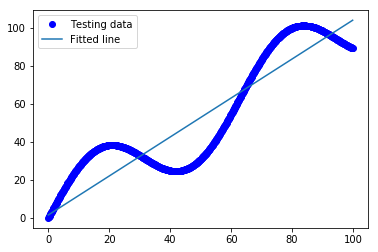

In [8]:
with tf.Session() as sess:
    # Initialize all variables in graph
    sess.run(tf.global_variables_initializer())
    # Gradient descent for 500 steps:
    for _ in range(5000):
        # Select from random mini batch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        # Do gradient descent step
        _, loss_val = sess.run([opt_operation, loss], feed_dict={X: X_batch, y: y_batch})
    print(sess.run([W, b]))

    # Display results
    plt.plot(X_data, y_data, 'bo', label='Testing data')
    plt.plot(X_data, sess.run(W) * X_data + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
